## Emotion detector: Six basic emotions: anger, disgust, fear, joy, sadness, and surprise

In [1]:
pip install --upgrade datasets fsspec

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 18.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; pl

In [139]:
# from datasets import list_datasets

In [140]:
# from datasets import list_datasets

In [141]:
# all_datasets = list_datasets()
# print(f"There are {len(all_datasets)} datasets currently available on the Hub")
# print(f"The first 10 are: {all_datasets[:10]}")

## Loading the dataset

In [6]:
from datasets import load_dataset

In [7]:
from datasets import load_dataset

emotions = load_dataset("emotion")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [8]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

## EDA

In [9]:
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [10]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [11]:
train_ds.column_names

['text', 'label']

In [12]:
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [13]:
emotions.set_format(type="pandas")
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [14]:
# Adding the label name
def label_int2str(row):
  return emotions["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


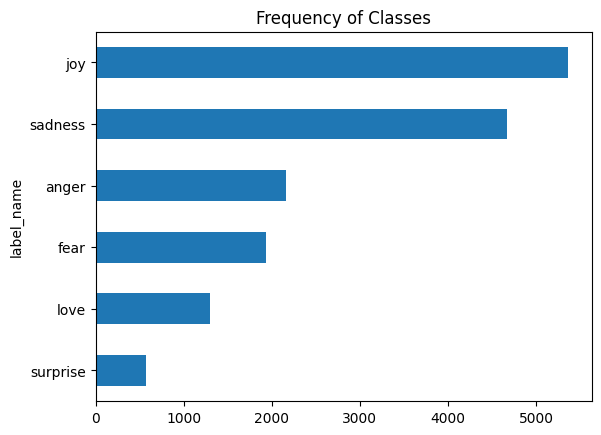

In [15]:
import matplotlib.pyplot as plt
df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

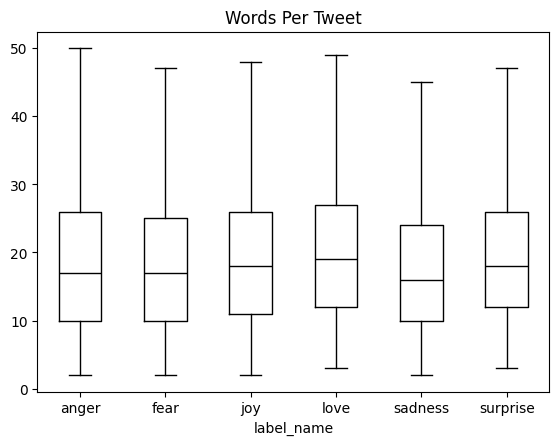

In [16]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by="label_name", grid=False,
           showfliers=False, color="black")
plt.suptitle("")
plt.show()

In [17]:
### reset the output format of our dataset
emotions.reset_format()

## Subword Tokenization (Word Piece for DistilBERT)

In [18]:
from transformers import AutoTokenizer
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
#  from transformers import DistilBertTokenizer
#  distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [19]:
tokenizer.vocab_size

30522

In [20]:
tokenizer.model_max_length

512

In [21]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [22]:
def tokenize(batch):
  return tokenizer(batch["text"], padding=True, truncation=True)

In [23]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [24]:
print(emotions_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


## Feature Extraction

In [25]:
from transformers import AutoModel
import torch as nn
model_ckpt = "distilbert-base-uncased"
device = nn.device("cuda" if nn.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [26]:
def extract_hidden_states(batch):
  inputs = {k:v.to(device) for k,v in batch.items()
            if k in tokenizer.model_input_names}
  with nn.no_grad():
    last_hidden_state = model(**inputs).last_hidden_state

  return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [27]:
emotions_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask", "label"])

In [28]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [30]:
emotions_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [31]:
emotions_hidden["train"][:10]

{'label': tensor([0, 0, 3, 2, 3, 0, 5, 4, 1, 2]),
 'input_ids': tensor([[  101,  1045,  2134,  2102,  2514, 26608,   102,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0],
         [  101,  1045,  2064,  2175,  2013,  3110,  2061, 20625,  2000,  2061,
           9636, 17772,  2074,  2013,  2108,  2105,  2619,  2040, 14977,  1998,
           2003,  8300,   102,     0,     0,     0,     0,     0,     0,     

## Train Val Split

In [32]:
import numpy as np

In [39]:
X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

## Data Visualization

In [40]:
from umap import UMAP
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

X_scaled = MinMaxScaler().fit_transform(X_train)
mapper = UMAP(n_components=2, metric='cosine').fit(X_scaled)
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,X,Y,label
0,4.460310,3.134875,0
1,-2.680643,3.696620,0
2,5.362026,6.410509,3
3,-2.277029,5.662750,2
4,-3.122073,5.705311,3


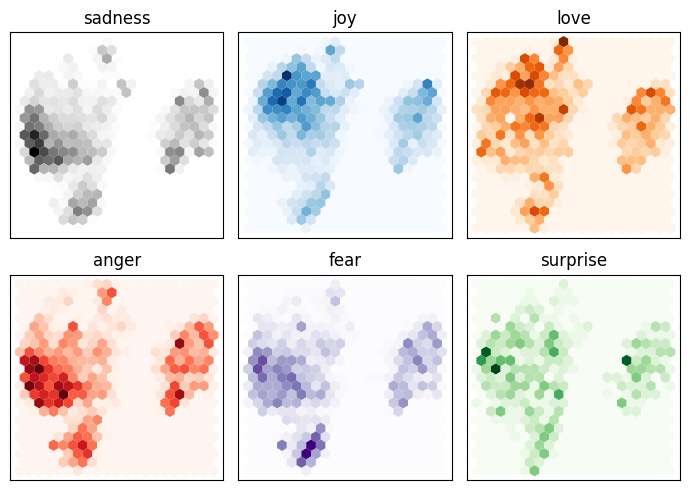

In [41]:
fig, axes = plt.subplots(2, 3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions["train"].features["label"].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
  df_emb_sub = df_emb.query(f"label == {i}")
  axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
                 gridsize=20, linewidths=(0,))
  axes[i].set_title(label)
  axes[i].set_xticks([])
  axes[i].set_yticks([])

plt.tight_layout()
plt.show()

## LogisticRegression

In [43]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.6345

In [45]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
  cm = confusion_matrix(y_true, y_preds, normalize="true")
  fig, ax = plt.subplots(figsize=(6,6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
  plt.title("Normalized confusion matrix")
  plt.show()

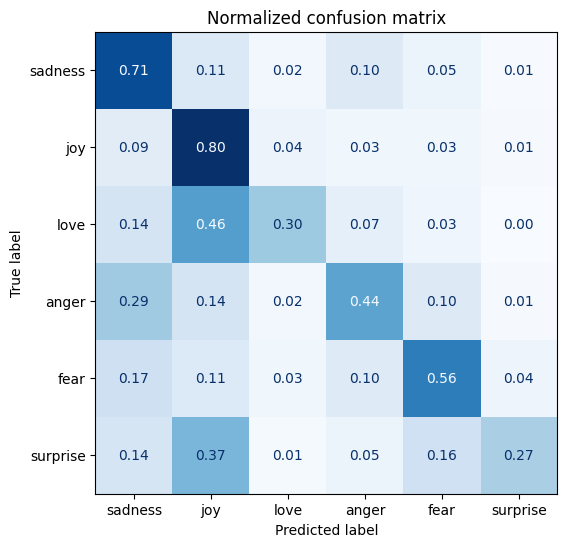

In [48]:
y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

## Fine-Tuning

In [50]:
## Clearing RAM
import torch
import gc
torch.cuda.empty_cache()
gc.collect()

90448

In [51]:
!nvidia-smi

Fri May 30 09:38:45 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   72C    P0             30W /   70W |     656MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [53]:
from transformers import AutoModelForSequenceClassification

In [57]:
num_labels = 6
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, num_labels=num_labels)
         .to(device))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [58]:
from sklearn.metrics import accuracy_score, f1_score

In [60]:
def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)
  return {"accuracy": acc, "f1": f1}

In [61]:
from huggingface_hub import notebook_login

In [62]:
notebook_login()

In [63]:
from transformers import Trainer, TrainingArguments

In [78]:
batch_size = 64
logging_steps = len(emotions_encoded["train"])
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir = model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  eval_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  log_level="error",
                                  report_to=[])

In [68]:
import transformers
print(transformers.__version__)

4.52.2


In [73]:
from transformers import TrainingArguments
print(TrainingArguments)


<class 'transformers.training_args.TrainingArguments'>


In [79]:
trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded["train"],
                  eval_dataset=emotions_encoded["validation"],
                  processing_class=tokenizer)
trainer.train();

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.307061,0.908000,0.907559
2,No log,0.214654,0.927000,0.926869


In [80]:
preds_output = trainer.predict(emotions_encoded["validation"])

In [81]:
preds_output.metrics

{'test_loss': 0.21465374529361725,
 'test_accuracy': 0.927,
 'test_f1': 0.9268694307334499,
 'test_runtime': 3.8296,
 'test_samples_per_second': 522.242,
 'test_steps_per_second': 8.356}

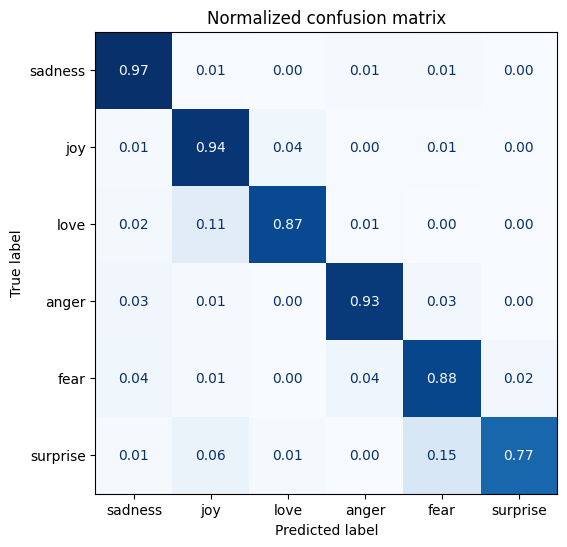

In [82]:
y_preds = np.argmax(preds_output.predictions, axis=1)

plot_confusion_matrix(y_preds, y_valid, labels)

In [83]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
  inputs = {k:v.to(device) for k,v in batch.items()
            if k in tokenizer.model_input_names}
  with torch.no_grad():
    output = model(**inputs)
    pred_label = torch.argmax(output.logits, axis=-1)
    loss = cross_entropy(output.logits, batch["label"].to(device),
                         reduction="none")
  return {"loss": loss.cpu().numpy(),
          "prediction_label":pred_label.cpu().numpy()}

In [84]:
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])

emotions_encoded["validation"] = emotions_encoded["validation"].map(forward_pass_with_label, batched=True, batch_size=16)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [88]:
 emotions_encoded.set_format("pandas")
 cols = ["text", "label", "prediction_label", "loss"]
 df_test = emotions_encoded["validation"][:][cols]
 df_test["label"] = df_test["label"].apply(label_int2str)
 df_test["prediction_label"] = (df_test["prediction_label"]
 .apply(label_int2str))

In [89]:
 df_test.sort_values("loss", ascending=False).head(10)

,text,label,prediction_label,loss
1950,i as representative of everything thats wrong ...,surprise,sadness,5.283035
1801,i feel that he was being overshadowed by the s...,love,sadness,5.111330
1963,i called myself pro life and voted for perry w...,joy,sadness,5.102316
1500,i guess we would naturally feel a sense of lon...,anger,sadness,4.962972
1509,i guess this is a memoir so it feels like that...,joy,fear,4.955450
318,i felt ashamed of these feelings and was scare...,fear,sadness,4.850056
882,i feel badly about reneging on my commitment t...,love,sadness,4.793518
1870,i guess i feel betrayed because i admired him ...,joy,sadness,4.498781
1111,im lazy my characters fall into categories of ...,joy,fear,4.491826
1964,i feel vaguely cheated and a little amused,joy,anger,4.343731


In [90]:
df_test.sort_values("loss", ascending=True).head(10)

,text,label,prediction_label,loss
1873,i feel practically virtuous this month i have ...,joy,joy,0.016066
260,i am feeling so invigorated and so ready to ke...,joy,joy,0.016245
578,i got to christmas feeling positive about the ...,joy,joy,0.016337
199,i feel invigorated full of energy ready for th...,joy,joy,0.016629
1861,im tired of feeling lethargic hating to work o...,sadness,sadness,0.016660
1561,i came to tv stations for first debut stage i ...,joy,joy,0.017025
1154,i love feeling carefree and without all these ...,joy,joy,0.017045
1505,im feeling hopeful about a great deal of thing...,joy,joy,0.017046
1523,i dont give a fuck because i feel like i canno...,joy,joy,0.017092
1466,i feel so ungrateful to be wishing this pregna...,sadness,sadness,0.017111


## Pushing to HUB

In [91]:
 trainer.push_to_hub(commit_message="Training completed!")

CommitInfo(commit_url='https://huggingface.co/primus29/distilbert-base-uncased-finetuned-emotion/commit/55d1c7368d03e9e8e015f86e87ce85a3242f0aa1', commit_message='Training completed!', commit_description='', oid='55d1c7368d03e9e8e015f86e87ce85a3242f0aa1', pr_url=None, repo_url=RepoUrl('https://huggingface.co/primus29/distilbert-base-uncased-finetuned-emotion', endpoint='https://huggingface.co', repo_type='model', repo_id='primus29/distilbert-base-uncased-finetuned-emotion'), pr_revision=None, pr_num=None)

In [93]:
from transformers import pipeline
 # Change `transformersbook` to your Hub username
model_id = "primus29/distilbert-base-uncased-finetuned-emotion"
classifier = pipeline("text-classification", model=model_id)

config.json:   0%|          | 0.00/837 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [131]:
custom_tweet = "I saw a movie today and it was really good."

In [135]:
preds = classifier(custom_tweet, return_all_scores=True)

/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [136]:
preds

[[{'label': 'LABEL_0', 'score': 0.012736301869153976},
  {'label': 'LABEL_1', 'score': 0.9614025950431824},
  {'label': 'LABEL_2', 'score': 0.011038356460630894},
  {'label': 'LABEL_3', 'score': 0.005664545111358166},
  {'label': 'LABEL_4', 'score': 0.003942815586924553},
  {'label': 'LABEL_5', 'score': 0.005215376149863005}]]

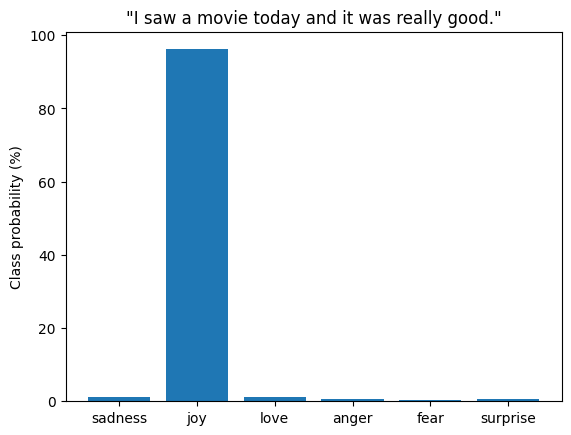

In [138]:
preds_df = pd.DataFrame(preds[0])
plt.bar(labels, 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_tweet}"')
plt.ylabel("Class probability (%)")
plt.show()